In [15]:
import os
import random
import itertools
import matplotlib.pyplot as plt
from PIL import Image

In [16]:
# Data Cleansing: Function to safely load images with error handling
def load_images_from_folder(folder_path):
    image_list = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            try:
                img = Image.open(file_path)
                image_list.append(img)
            except (IOError) as e:
                print(f"Error loading image {filename}: {e}")
    return image_list

# Load the classes to lists with error handling for corrupted images
books_orig_size = load_images_from_folder('Books_Before_Resize')
shoes_orig_size = load_images_from_folder('Shoes_Before_Resize')
chairs_orig_size = load_images_from_folder('Chairs_Before_Resize')
fridges_orig_size = load_images_from_folder('Fridges_Before_Resize')
tables_orig_size = load_images_from_folder('Tables_Before_Resize')


Error loading image Intentional_error.txt: cannot identify image file 'C:\\Users\\nyiri\\Desktop\\Msc_2felev\\MT\\MT_NHF\\Books_Before_Resize\\Intentional_error.txt'


In [ ]:
def display_images_from_list(images, title, labels=None):
    if labels:
        combined = list(zip(images, labels))
        random.shuffle(combined)
        images, labels = zip(*combined)
    else:
        labels = [None] * len(images)
    
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    fig.suptitle(title)
    
    for i, (ax, img) in enumerate(zip(axes.flatten(), images[:25])):
        ax.imshow(img)
        if labels:
            ax.set_title(labels[i], fontsize=8)
        ax.axis('off')
    
    plt.show()
    
display_images_from_list(books_orig_size, 'Books Before Resize')

In [17]:
def Img_Resize(image_list, image_type, output_size=(256, 256)):
    # New size of images 
    output_size = (256, 256)
    # Labels for classes
    type_dict = {'book': 0, 'chair': 1, 'table': 1, 'fridge': 1, 'shoe': 2}
    labels = {f"{image_type}_{i}": type_dict[image_type] for i in range(1, len(image_list) + 1)}
    resized_images = []
    
    for img in image_list:
        try:
            resized_img = img.resize(output_size)
            resized_images.append(resized_img)
        except Exception as e:
            print(f"Error resizing image: {e}")
    
    return resized_images, labels

In [18]:
books, books_labels = Img_Resize(books_orig_size, 'book')
books, books_labels = books[:50], dict(itertools.islice(books_labels.items(), 50))

shoes, shoes_labels = Img_Resize(shoes_orig_size, 'shoe')
shoes, shoes_labels = shoes[:50], dict(itertools.islice(shoes_labels.items(), 50))

chairs, chairs_labels = Img_Resize(chairs_orig_size, 'chair')
chairs, chairs_labels = chairs[:17], dict(itertools.islice(chairs_labels.items(), 17))

fridges, fridges_labels = Img_Resize(fridges_orig_size, 'fridge')
fridges, fridges_labels = fridges[:16], dict(itertools.islice(fridges_labels.items(), 16))

tables, tables_labels = Img_Resize(tables_orig_size, 'table')
tables, tables_labels = tables[:17], dict(itertools.islice(tables_labels.items(), 17))

In [19]:
# furniture list is a combination of chairs, fridges and tables
furniture = chairs + fridges + tables
furniture_labels = {}
furniture_labels.update(chairs_labels)
furniture_labels.update(fridges_labels)
furniture_labels.update(tables_labels)

In [20]:
print(books_labels)

{'book_1': 0, 'book_2': 0, 'book_3': 0, 'book_4': 0, 'book_5': 0, 'book_6': 0, 'book_7': 0, 'book_8': 0, 'book_9': 0, 'book_10': 0, 'book_11': 0, 'book_12': 0, 'book_13': 0, 'book_14': 0, 'book_15': 0, 'book_16': 0, 'book_17': 0, 'book_18': 0, 'book_19': 0, 'book_20': 0, 'book_21': 0, 'book_22': 0, 'book_23': 0, 'book_24': 0, 'book_25': 0, 'book_26': 0, 'book_27': 0, 'book_28': 0, 'book_29': 0, 'book_30': 0, 'book_31': 0, 'book_32': 0, 'book_33': 0, 'book_34': 0, 'book_35': 0, 'book_36': 0, 'book_37': 0, 'book_38': 0, 'book_39': 0, 'book_40': 0, 'book_41': 0, 'book_42': 0, 'book_43': 0, 'book_44': 0, 'book_45': 0, 'book_46': 0, 'book_47': 0, 'book_48': 0, 'book_49': 0, 'book_50': 0}


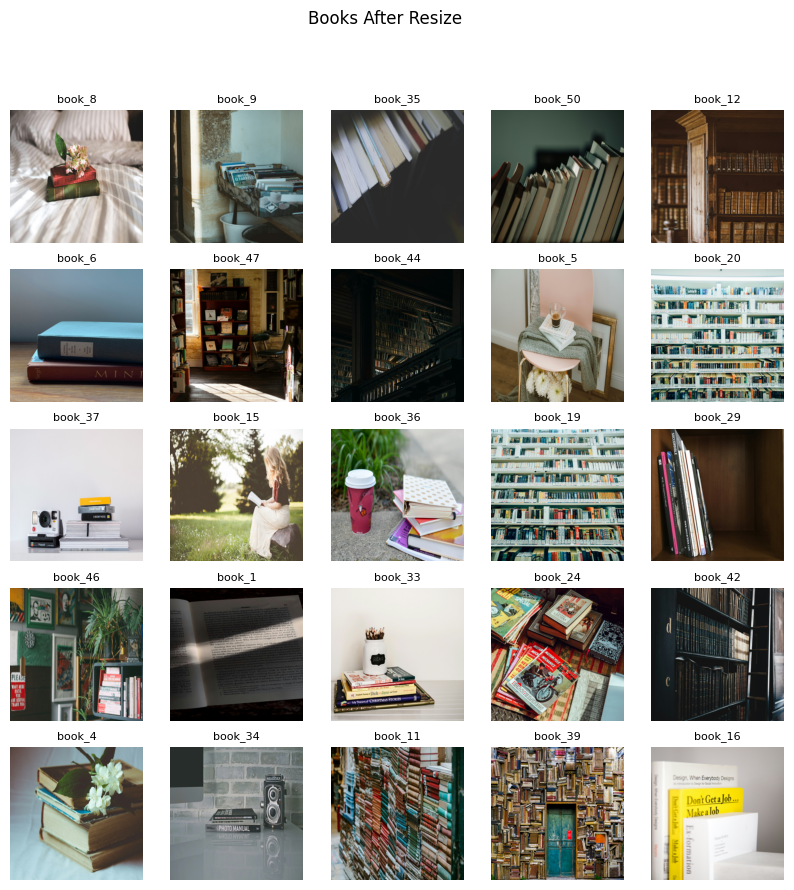

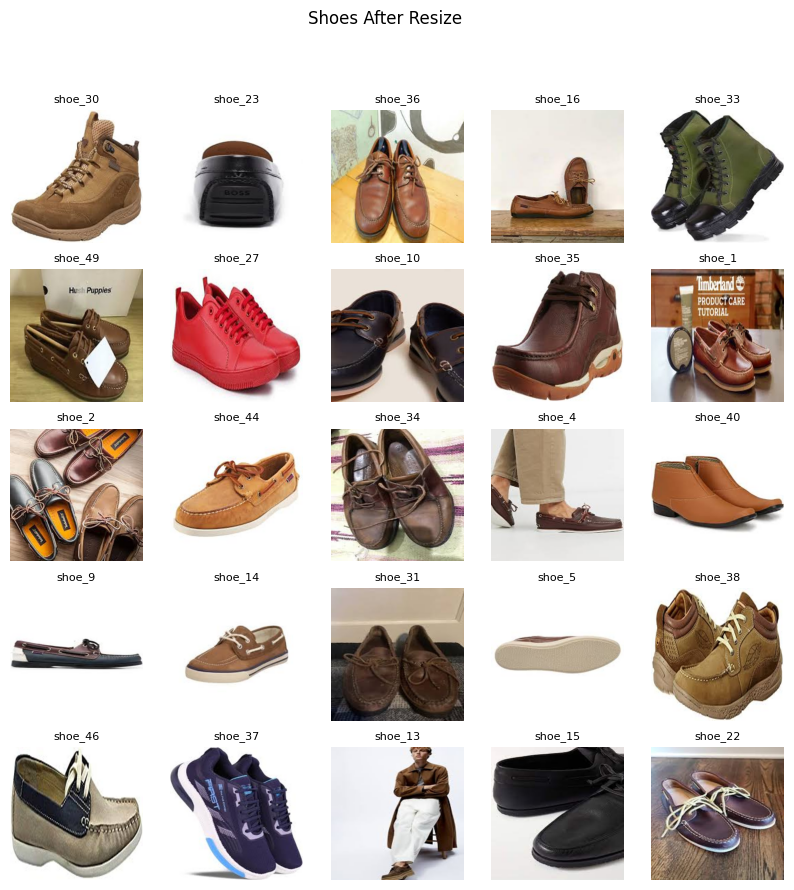

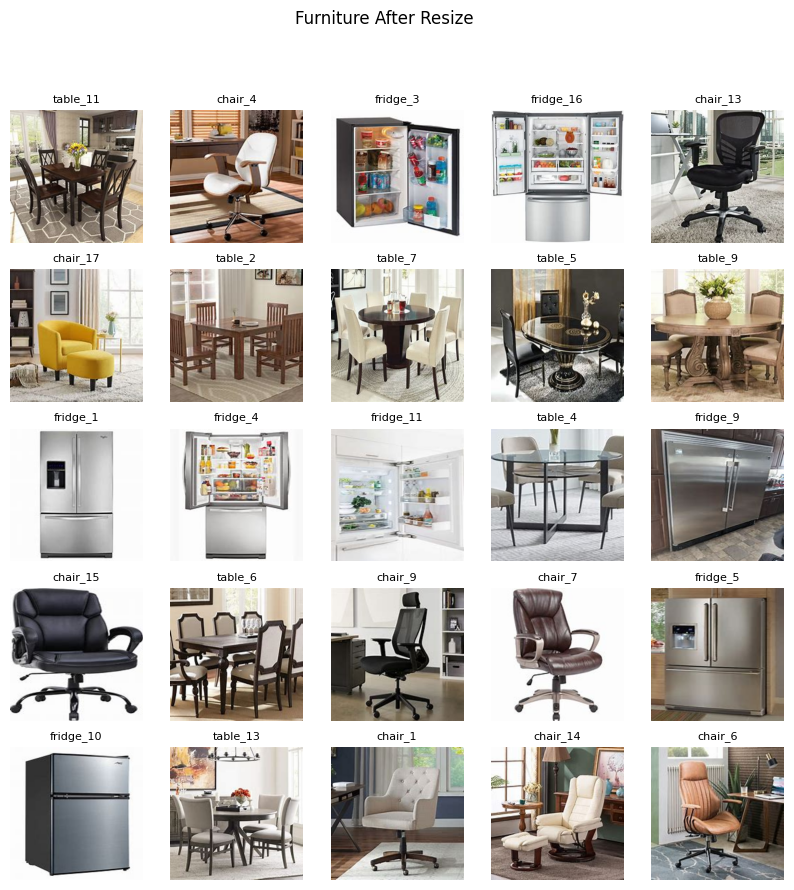

In [21]:
display_images_from_list(books, 'Books After Resize', books_labels)
display_images_from_list(shoes, 'Shoes After Resize', shoes_labels)
display_images_from_list(furniture, 'Furniture After Resize', furniture_labels)

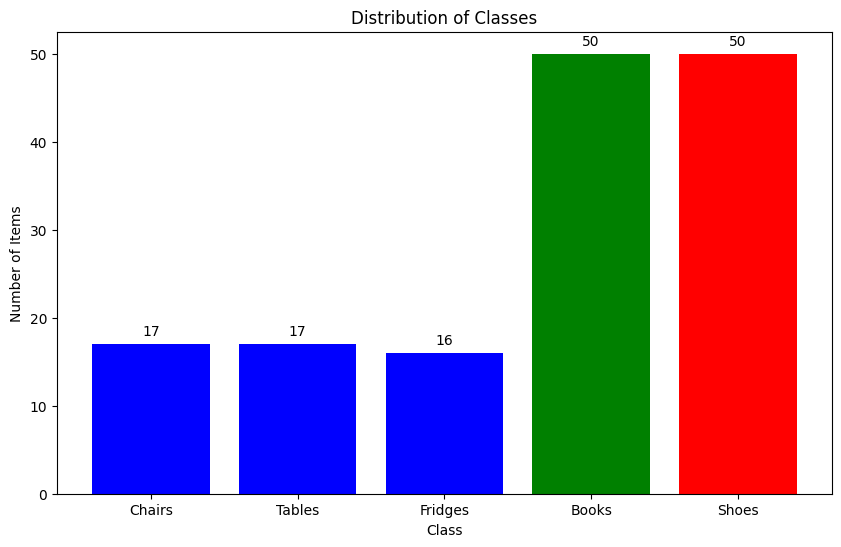

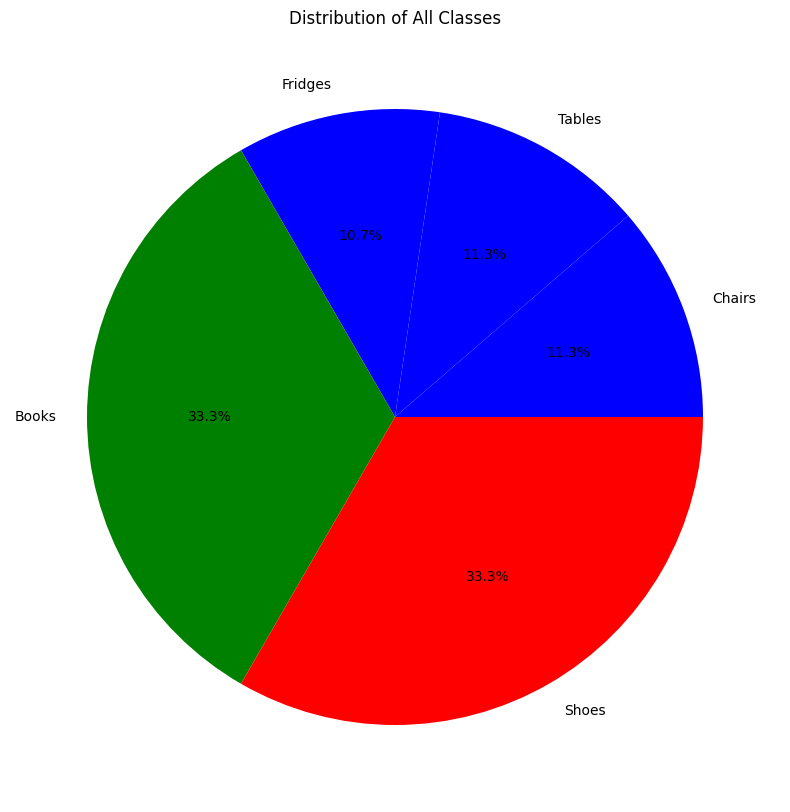

In [22]:
# Count the number of items in each class
# Combine all class counts for a single pie chart
all_counts = {
    'Chairs': len(chairs),
    'Tables': len(tables),
    'Fridges': len(fridges),
    'Books': len(books),
    'Shoes': len(shoes)
}

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(all_counts.keys(), all_counts.values(), color=['blue', 'blue', 'blue', 'green', 'red'])
# Add data labels to the columns
for i, (key, value) in enumerate(all_counts.items()):
    plt.text(i, value + 1, str(value), ha='center')

plt.xlabel('Class')
plt.ylabel('Number of Items')
plt.title('Distribution of Classes')
plt.figure(figsize=(10, 10))
plt.pie(all_counts.values(), labels=all_counts.keys(), autopct='%1.1f%%', colors=['blue', 'blue', 'blue', 'green', 'red'])
plt.title('Distribution of All Classes')
plt.show()